#**Part 1**

In [ ]:
# Ques
#  >> Analyse and explore the data (size, datatype, count, describe, etc) - comment below, the count, is the result of df.printSchema() all StringType?
#  >> Check for missing values in each column and apply imputation pyspark - comment below the column you found null values, % of nume values, if none type none



In [71]:
pip install pyspark

In [72]:
from pyspark.sql import SparkSession

In [73]:
spark = SparkSession.builder.getOrCreate()

In [74]:
spark

In [75]:
df_spark = spark.read.csv('Housing.csv' , header = True,inferSchema=True)
df_spark.printSchema()

root
 |-- price: integer (nullable = true)
 |-- area: integer (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: integer (nullable = true)
 |-- stories: integer (nullable = true)
 |-- mainroad: string (nullable = true)
 |-- guestroom: string (nullable = true)
 |-- basement: string (nullable = true)
 |-- hotwaterheating: string (nullable = true)
 |-- airconditioning: string (nullable = true)
 |-- parking: integer (nullable = true)
 |-- prefarea: string (nullable = true)
 |-- furnishingstatus: string (nullable = true)



In [76]:
df_spark.show()

+--------+-----+--------+---------+-------+--------+---------+--------+---------------+---------------+-------+--------+----------------+
|   price| area|bedrooms|bathrooms|stories|mainroad|guestroom|basement|hotwaterheating|airconditioning|parking|prefarea|furnishingstatus|
+--------+-----+--------+---------+-------+--------+---------+--------+---------------+---------------+-------+--------+----------------+
|13300000| 7420|       4|        2|      3|     yes|       no|      no|             no|            yes|      2|     yes|       furnished|
|12250000| 8960|       4|        4|      4|     yes|       no|      no|             no|            yes|      3|      no|       furnished|
|12250000| 9960|       3|        2|      2|     yes|       no|     yes|             no|             no|      2|     yes|  semi-furnished|
|12215000| 7500|       4|        2|      2|     yes|       no|     yes|             no|            yes|      3|     yes|       furnished|
|11410000| 7420|       4|        1

In [77]:
##size

#rows
rows = df_spark.count()

#columns
cols = len(df_spark.columns)

print(rows,cols)

545 13


In [78]:
## Datatypes of the dataframe

df_spark.dtypes

[('price', 'int'),
 ('area', 'int'),
 ('bedrooms', 'int'),
 ('bathrooms', 'int'),
 ('stories', 'int'),
 ('mainroad', 'string'),
 ('guestroom', 'string'),
 ('basement', 'string'),
 ('hotwaterheating', 'string'),
 ('airconditioning', 'string'),
 ('parking', 'int'),
 ('prefarea', 'string'),
 ('furnishingstatus', 'string')]

In [79]:
## Describing the Dataframe

# df_spark.describe()
df_spark.summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+--------+---------+--------+---------------+---------------+------------------+--------+----------------+
|summary|             price|              area|          bedrooms|         bathrooms|           stories|mainroad|guestroom|basement|hotwaterheating|airconditioning|           parking|prefarea|furnishingstatus|
+-------+------------------+------------------+------------------+------------------+------------------+--------+---------+--------+---------------+---------------+------------------+--------+----------------+
|  count|               545|               545|               545|               545|               545|     545|      545|     545|            545|            545|               545|     545|             545|
|   mean| 4766729.247706422|  5150.54128440367|2.9651376146788992|1.2862385321100918|1.8055045871559634|    null|     null|    null|           null|           n

In [83]:
from pyspark.sql import functions as F

# Calculate the count of null and NaN values for each column
null_counts = df_spark.select([F.sum(F.when(F.isnan(c) | F.col(c).isNull(), 1)).alias(c) for c in df_spark.columns])


# print(type(null_counts))
# Convert the result to a dictionary for easier access
null_counts_dict = null_counts.first().asDict()

# Print the count of null and NaN values for each column
for column, count in null_counts_dict.items():
    print(f"{column}: {count}")


price: None
area: None
bedrooms: None
bathrooms: None
stories: None
mainroad: None
guestroom: None
basement: None
hotwaterheating: None
airconditioning: None
parking: None
prefarea: None
furnishingstatus: None


In [85]:
columns_null = [col for col in df_spark.columns if df_spark.filter(f"{col} IS NULL").count() > 0]

if columns_null:
    print("Null values found")
    for col in columns_null:
        print(col)
else:
    print("None")

None


# **Part 2**

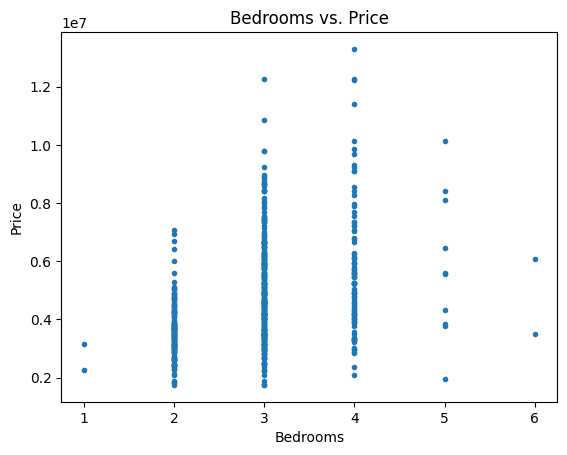

In [101]:
#Ques> Plot the distribution between Price and Number of bedrooms


import matplotlib.pyplot as plt
import numpy as np

bedrooms = df_spark.select("bedrooms").collect()
price = df_spark.select("price").collect()

xpoints = np.array([row[0] for row in bedrooms])
ypoints = np.array([row[0] for row in price])


plt.plot(xpoints, ypoints ,'.')

#setting the label and titles
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
#show the graph
plt.show()


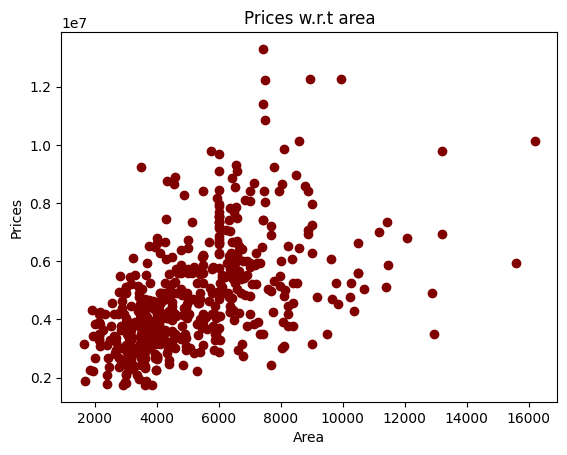

In [115]:
#Ques> Plot the distribution between area and price

import matplotlib.pyplot as plt
import numpy as np

area = np.array(df_spark.select("area").collect()).flatten()
price = np.array(df_spark.select("price").collect()).flatten()

#creating the scatter
plt.scatter(area, price, color='maroon', marker='o')


#setting the label and titles
plt.xlabel("Area")
plt.ylabel("Prices")
plt.title("Prices w.r.t area")

#show the plot
plt.show()


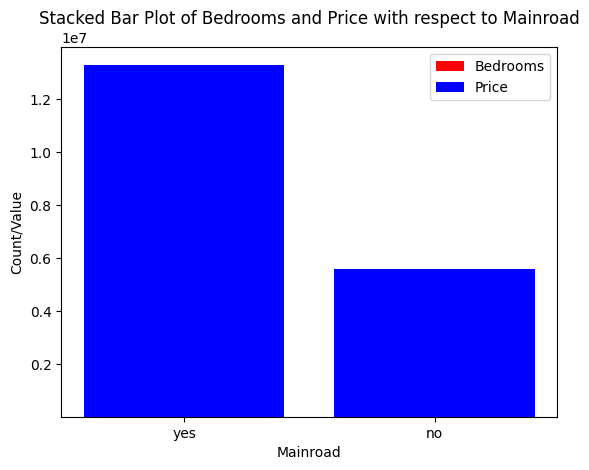

In [122]:
#Ques>Plot the distribution between main road and number of bedrooms and price range


import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a PySpark DataFrame named 'df_spark'

# Convert the PySpark DataFrame to a pandas DataFrame
df = df_spark.toPandas()

# Extract the columns as NumPy arrays
mainroad = np.array(df["mainroad"])
bedrooms = np.array(df["bedrooms"])
price = np.array(df["price"])

# Create the stacked bar plot
plt.bar(mainroad, bedrooms, color='r', label='Bedrooms')
plt.bar(mainroad, price, bottom=bedrooms, color='b', label='Price')

# Set labels and title
plt.xlabel("Mainroad")
plt.ylabel("Count/Value")
plt.title("Stacked Bar Plot of Bedrooms and Price with respect to Mainroad")

# Show legend
plt.legend()

# Show the plot
plt.show()


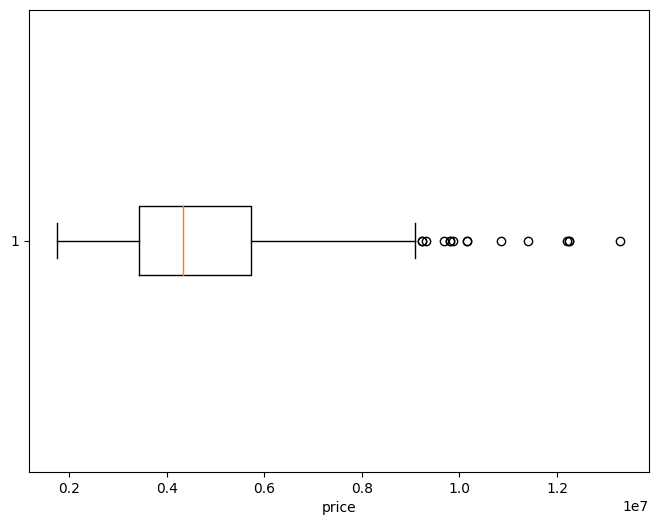

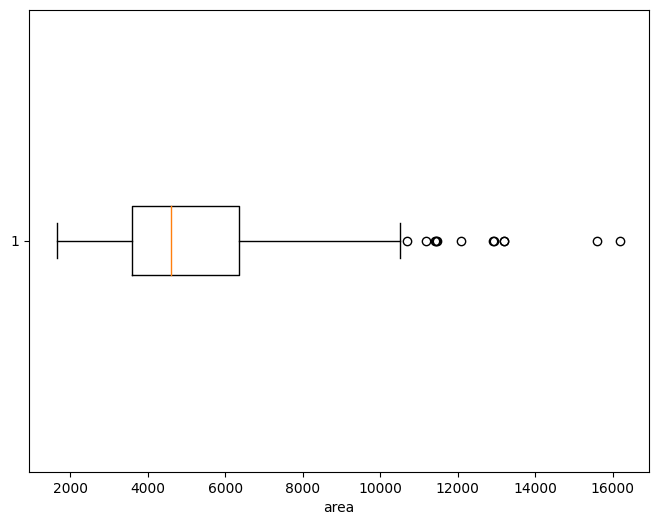

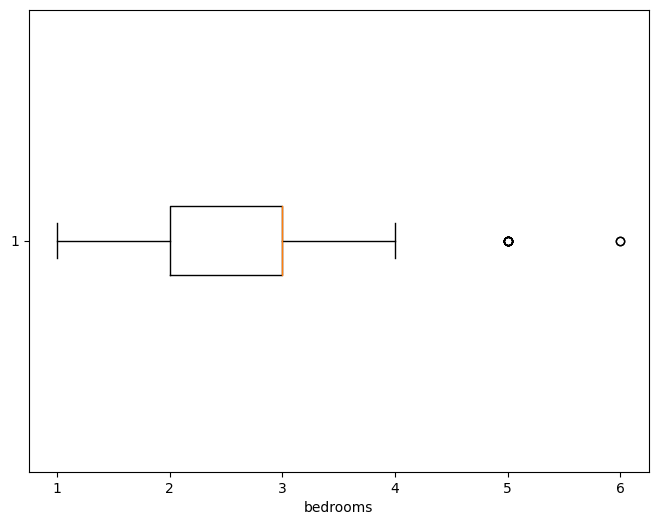

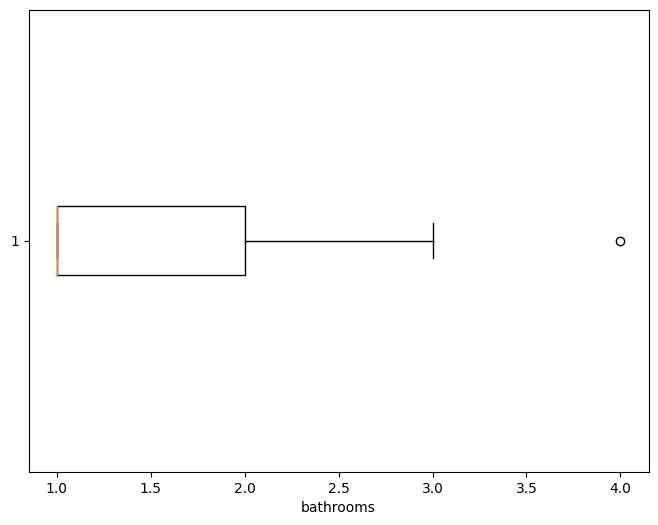

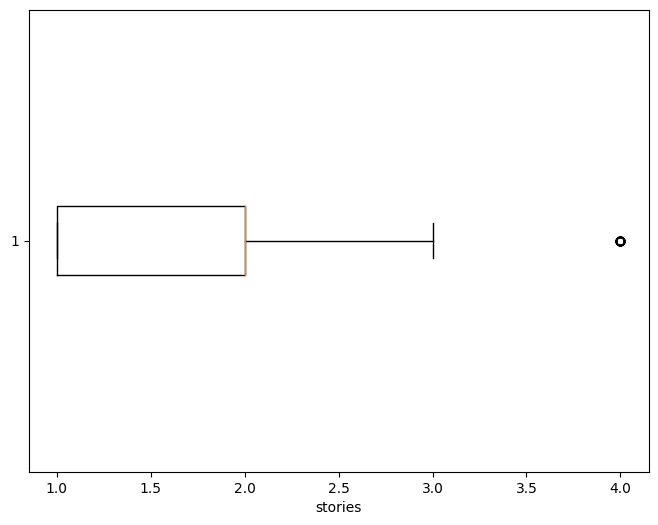

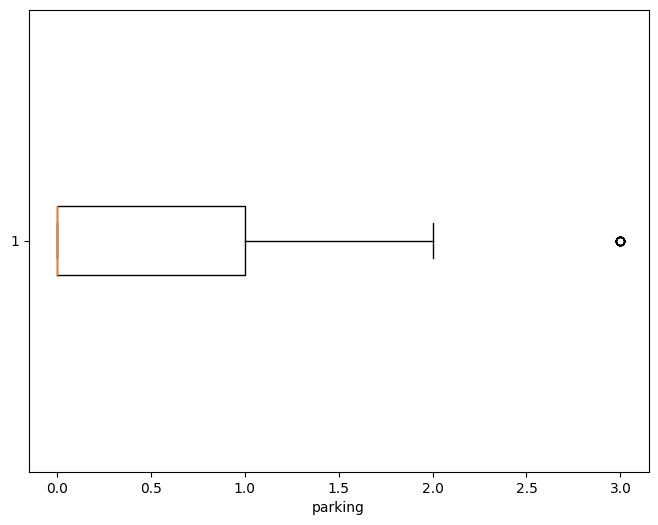

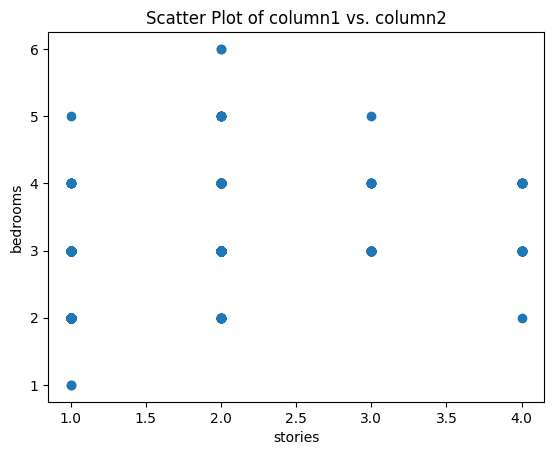

In [119]:
#Ques>  After analysing the dataset find an outlier using plots

# Convert the PySpark DataFrame to a pandas DataFrame
df = df_spark.toPandas()

# Plot box plots for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column], vert=False)
    plt.xlabel(column)
    plt.show()

# Plot scatter plots for two numerical columns
# For example, 'column1' and 'column2'
column1 = 'stories'
column2 = 'bedrooms'
plt.scatter(df[column1], df[column2])
plt.xlabel(column1)
plt.ylabel(column2)
plt.title("Scatter Plot of column1 vs. column2")
plt.show()


# **Part 3**

In [132]:
#Ques> Using pyspark, show the Price Distribution by Bedrooms and Bathrooms

from pyspark.sql import functions as F
grouped_data = df_spark.groupBy("bedrooms", "bathrooms")
grouped_data_summary = grouped_data.agg(
    F.count("*").alias("count"),
    F.mean("price").alias("mean_price"),
    F.median("price").alias("median_price"),
    F.min("price").alias("min_price"),
    F.max("price").alias("max_price")
)

grouped_data_summary.show()

+--------+---------+-----+-----------------+------------+---------+---------+
|bedrooms|bathrooms|count|       mean_price|median_price|min_price|max_price|
+--------+---------+-----+-----------------+------------+---------+---------+
|       6|        1|    1|        3500000.0|   3500000.0|  3500000|  3500000|
|       3|        1|  224|      4463484.375|   4273500.0|  1750000|  9800000|
|       2|        2|    8|        4194750.0|   3832500.0|  2590000|  6685000|
|       1|        1|    2|        2712500.0|   2712500.0|  2275000|  3150000|
|       3|        3|    4|        6807500.0|   6860000.0|  2660000| 10850000|
|       4|        3|    4|        7250250.0|   7325500.0|  4200000| 10150000|
|       2|        1|  128|     3596851.5625|   3500000.0|  1750000|  7070000|
|       6|        2|    1|        6083000.0|   6083000.0|  6083000|  6083000|
|       3|        2|   72|6379568.611111111|   6300000.0|  3430000| 12250000|
|       5|        2|    4|        5405750.0|   4725000.0|  37730

In [138]:
#Ques> Average numbers of bedrooms

# from pyspark.sql.functions import avg
# # bedrooms =
# avg(df_spark.select("bedrooms"))
# # avg(bedrooms).show()

df_spark.agg({'bedrooms':'avg'}).show()


+------------------+
|     avg(bedrooms)|
+------------------+
|2.9651376146788992|
+------------------+



In [151]:
#Ques > Assuming houses with a basement and parking are bunglows, create a boolean column for house_type and analyse it.

# df_spark.select('basement','parking').show()

basement = df_spark.select('basement')
parking = df_spark.select('parking')

# basement.show()
# parking.show()

# df_spark =

df_spark.withColumn("isBunglow",when((col("basement") == "yes") & (col("parking")  > 0), True).otherwise(False)).show()


+--------+-----+--------+---------+-------+--------+---------+--------+---------------+---------------+-------+--------+----------------+---------+
|   price| area|bedrooms|bathrooms|stories|mainroad|guestroom|basement|hotwaterheating|airconditioning|parking|prefarea|furnishingstatus|isBunglow|
+--------+-----+--------+---------+-------+--------+---------+--------+---------------+---------------+-------+--------+----------------+---------+
|13300000| 7420|       4|        2|      3|     yes|       no|      no|             no|            yes|      2|     yes|       furnished|    false|
|12250000| 8960|       4|        4|      4|     yes|       no|      no|             no|            yes|      3|      no|       furnished|    false|
|12250000| 9960|       3|        2|      2|     yes|       no|     yes|             no|             no|      2|     yes|  semi-furnished|     true|
|12215000| 7500|       4|        2|      2|     yes|       no|     yes|             no|            yes|      3| 